In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp

%matplotlib widget


def plot_vector(unit_vectors):
    # Create a figure and a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    u, v = np.meshgrid(u, v)

    # Convert spherical coordinates to Cartesian coordinates for unit sphere
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)

    # Plot the unit sphere
    ax.plot_surface(x, y, z, color = 'b', alpha=0.2)
    
    #plot meshgrid
    ax.plot_wireframe(x, y, z, color = 'k', alpha=0.1)

    # Define a list of colors
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    # Plot unit vectors
    for i, unit_vector in enumerate(unit_vectors):
        # Normalize the vector to make it a unit vector
        unit_vector = unit_vector / np.linalg.norm(unit_vector)
        
        # Plot the unit vector as a quiver with a different color
        color = colors[i % len(colors)]  # Cycle through colors
        ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color=color)

    # Plot the origin
    ax.plot([0], [0], [0], marker='+', color='r', label='Origin')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set plot title
    ax.set_title('Unit Sphere')
    ax.axis('equal')

    # Enable interactive rotation, panning, and zooming
    ax.view_init(elev=20, azim=30)
    ax.mouse_init()

    # Show the plot
    plt.show()

    return ax

def euler2rotm(euler_angs):
    roll = np.deg2rad(euler_angs[0])
    pitch = np.deg2rad(euler_angs[1])
    yaw = np.deg2rad(euler_angs[2])
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll), np.cos(roll)]
                    ])

    R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]
                    ])

    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw), np.cos(yaw), 0],
                    [0, 0, 1]
                    ])

    R = R_z @ R_y @ R_x

    return R

def plot_sphere_line(ax, start_point, end_point, num_points=100):

    # Parametrically define the line points
    t = np.linspace(0, 1, num_points)
    line_points = (1 - t)[:, np.newaxis] * start_point + t[:, np.newaxis] * end_point

    # Map line points to the sphere's surface
    line_points /= np.linalg.norm(line_points, axis=1, keepdims=True)

    # Plot the line on the sphere
    ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], color='m', label='Line on Sphere')

    for i, unit_vector in enumerate(line_points):
        # Normalize the vector to make it a unit vector
        if i%10==0:
            unit_vector = unit_vector / np.linalg.norm(unit_vector)
            # Define a list of colors
            # colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
            # Plot the unit vector as a quiver with a different color
            # color = colors[i % len(colors)]
            ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color='m', alpha =0.2)

    # print(line_points)

def interpolate_rpy(start_rpy, end_rpy, num_points):
    # Convert RPY angles to rotation matrices
    start_end = R.from_euler('xyz', [list(start_rpy), list(end_rpy)], degrees=True)
    
    # Create a Slerp object and perform interpolation
    slerp = Slerp([0, 2], start_end)
    inter_time = np.linspace(0, 2, num_points)
    interpolated_rotations = slerp(inter_time)
    
    # Convert interpolated rotations to RPY angles
    interpolated_rpy_angles = interpolated_rotations.as_euler('xyz', degrees=True)
    
    return interpolated_rpy_angles



[[-0.49240388 -0.86270924  0.11520062]
 [ 0.41317591 -0.11520062  0.9033352 ]
 [-0.76604444  0.49240388  0.41317591]]
[-0.22892184  0.49092447  0.71077078  0.44876815]


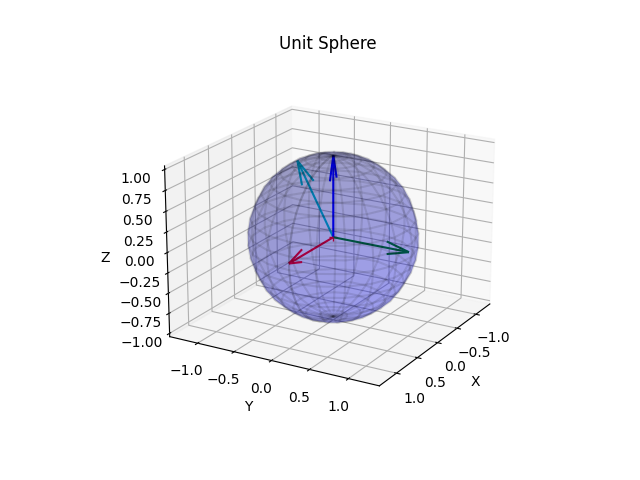

In [2]:
z_ax = np.array([0, 0, 1])
y_ax = np.array([0, 1, 0])
x_ax = np.array([1, 0, 0]) 

rpy = np.array([50, 50, 140])  #destination RPY angles  ###Change values here###

r = euler2rotm(rpy)
qat = R.from_euler('xyz', rpy, degrees=True).as_quat()

u_vec = r@z_ax

u_vec = euler2rotm(np.array([90, 0, 0]))@u_vec

print(r)
print(qat)
# Get the existing subplot using the plot_vector function
ax = plot_vector([x_ax, y_ax, z_ax, u_vec])

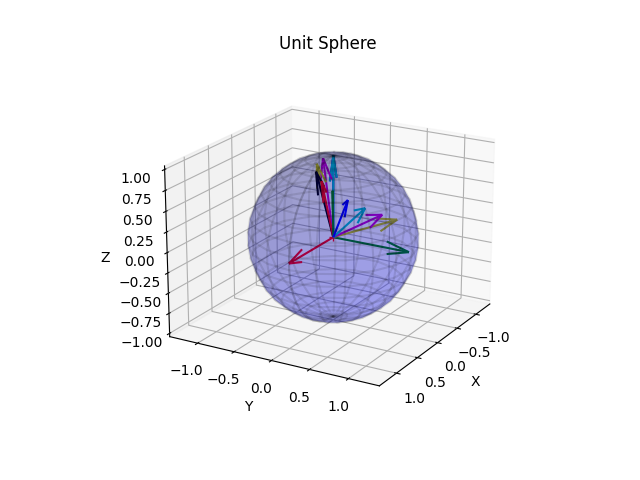

In [3]:
#linear interpolation
import numpy as np
from scipy.spatial.transform import Rotation as R

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation


# Interpolate Euler angles directly
interpolated_rpy_angles = []
for t in np.linspace(0, 1, num_points):
    intermediate_rpy = (1 - t) * start_rpy + t * end_rpy  
    interpolated_rpy_angles.append(intermediate_rpy)

euls_list = [x_ax, y_ax, z_ax]
for euls in interpolated_rpy_angles:
    euls_list.append(euler2rotm(np.array([euls[0], euls[1], euls[2]]))@z_ax)
    # print(euls)

ax = plot_vector(euls_list)

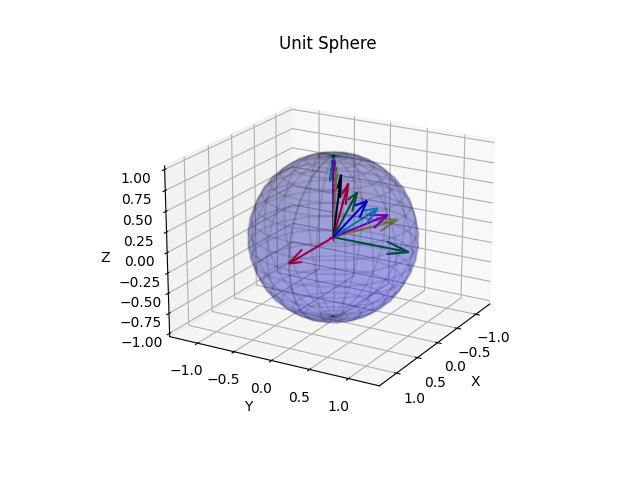

In [4]:
# With Spherical linear interpolation

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation

interp_rot = interpolate_rpy(start_rpy, end_rpy, num_points)  #slerp function

euls_list = [x_ax, y_ax, z_ax]
for euls in interp_rot:
    # print(euler2rotm(euls[0], euls[1], euls[2]))
    euls_list.append(euler2rotm(euls)@z_ax)

ax = plot_vector(euls_list)




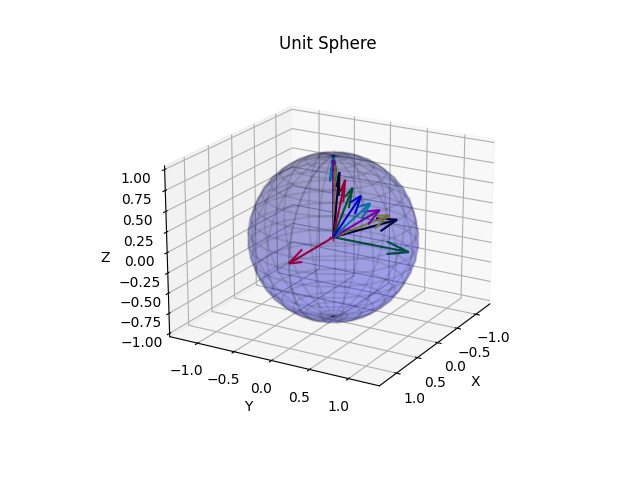

In [5]:
def quaternion_slerp(q0, q1, t):
    # Compute the dot product between the two quaternions
    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)
    
    return result

# Define start and end RPY angles (in degrees)
start_rpy = np.array([0, 0, 0])
end_rpy = rpy

# Convert RPY angles to quaternions
start_quat = R.from_euler('xyz', start_rpy, degrees=True).as_quat()
end_quat = R.from_euler('xyz', end_rpy, degrees=True).as_quat()

euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = R.from_quat(interpolated_quat).as_euler('xyz', degrees=True)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(interpolated_rpy)@z_ax)


# for vec in euls_list:
#     print(vec)

ax = plot_vector(euls_list)


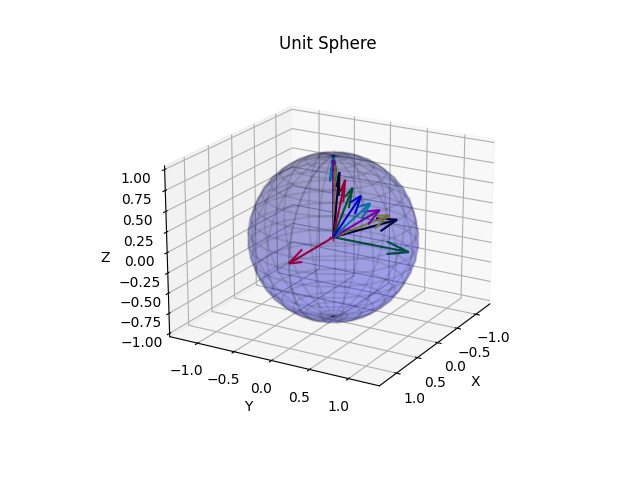

In [6]:
class Quaternion:
    def __init__(self, x, y, z, w):
        self.x = x
        self.y = y
        self.z = z
        self.w = w

def to_quaternion(rpy):
    # rpy = np.deg2rad(rpy)
    rpy.roll = np.deg2rad(rpy.roll)
    rpy.pitch = np.deg2rad(rpy.pitch)
    rpy.yaw = np.deg2rad(rpy.yaw)

    cr = np.cos(rpy.roll * 0.5)
    sr = np.sin(rpy.roll * 0.5)
    cp = np.cos(rpy.pitch * 0.5)
    sp = np.sin(rpy.pitch * 0.5)
    cy = np.cos(rpy.yaw * 0.5)
    sy = np.sin(rpy.yaw * 0.5)

    q = Quaternion(
        sr * cp * cy - cr * sp * sy,
        cr * sp * cy + sr * cp * sy,
        cr * cp * sy - sr * sp * cy,
        cr * cp * cy + sr * sp * sy
    )

    return q

class EulerAngles:
    def __init__(self, roll, pitch, yaw):
        self.roll = roll
        self.pitch = pitch
        self.yaw = yaw

def to_euler_angles(q):
    angles = EulerAngles(0,0,0)

    # roll (x-axis rotation)
    sinr_cosp = 2 * (q.w * q.x + q.y * q.z)
    cosr_cosp = 1 - 2 * (q.x * q.x + q.y * q.y)
    angles.roll = np.arctan2(sinr_cosp, cosr_cosp)

    # pitch (y-axis rotation)
    sinp = np.sqrt(1 + 2 * (q.w * q.y - q.x * q.z))
    cosp = np.sqrt(1 - 2 * (q.w * q.y - q.x * q.z))
    angles.pitch = 2 * np.arctan2(sinp, cosp) - np.pi / 2

    # yaw (z-axis rotation)
    siny_cosp = 2 * (q.w * q.z + q.x * q.y)
    cosy_cosp = 1 - 2 * (q.y * q.y + q.z * q.z)
    angles.yaw = np.arctan2(siny_cosp, cosy_cosp)

    # Convert to degrees
    angles.roll = np.rad2deg(angles.roll)
    angles.pitch = np.rad2deg(angles.pitch)
    angles.yaw = np.rad2deg(angles.yaw)

    return angles

def quaternion_slerp(qstart, qend, t):
    # Compute the dot product between the two quaternions
    q0 = np.array([qstart.x, qstart.y, qstart.z, qstart.w])
    q1 = np.array([qend.x, qend.y, qend.z, qend.w])

    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)

    q_result = Quaternion(result[0], result[1], result[2], result[3])
    
    return q_result


# Define start and end RPY angles (in degrees)
start_rpy = EulerAngles(0, 0, 0)
end_rpy = EulerAngles(rpy[0], rpy[1], rpy[2])


start_quat = to_quaternion(start_rpy)
end_quat = to_quaternion(end_rpy)


euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = to_euler_angles(interpolated_quat)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(np.array([interpolated_rpy.roll, interpolated_rpy.pitch, interpolated_rpy.yaw]))@z_ax)


ax = plot_vector(euls_list)

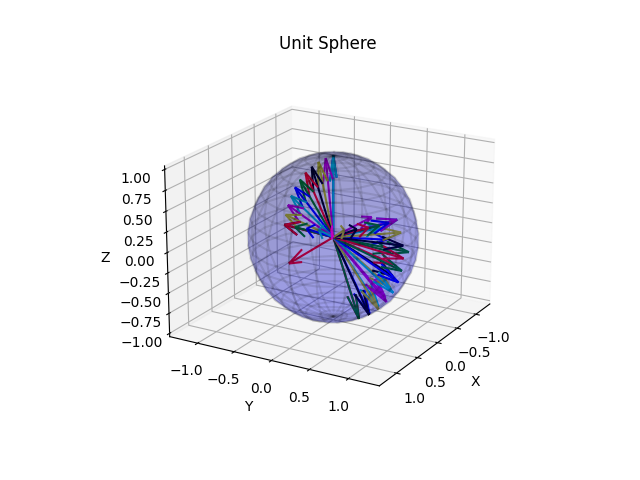

<Axes3D: title={'center': 'Unit Sphere'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [7]:
euls_list = [[ 1 , 0 , 0 ] ,
[ 0 , 1 , 0 ] ,
[ 0 , 0 , 1 ] ,
[ 0.0 , 0.0 , 1.0 ] ,
[ 0.10889859494501754 , -0.037217592979503486 , 0.9933559013726214 ] ,
[ 0.21773527310682736 , -0.06961203505483832 , 0.9735222213286244 ] ,
[ 0.32489461291523186 , -0.09670250779818328 , 0.9407933436649113 ] ,
[ 0.4287860888975829 , -0.118086917588568 , 0.8956550507100068 ] ,
[ 0.5278676792456429 , -0.13344786373511522 , 0.8387773130410437 ] ,
[ 0.620668753460934 , -0.1425573495352161 , 0.7710043453643726 ] ,
[ 0.7058119003659286 , -0.1452801663431877 , 0.693342076156591 ] ,
[ 0.7820333724961894 , -0.14157590042096294 , 0.6069432170493628 ] ,
[ 0.8482018434250815 , -0.13149953278389068 , 0.513090153567491 ] ,
[ 0.9033351996132094 , -0.11520062313835959 , 0.4131759111665352 ],
[ 0.9033351996132101 , -0.11520062313835923 , 0.4131759111665342 ] ,
[ 0.9102349921600994 , 0.02753044640045077 , 0.4131759111665342 ] ,
[ 0.8947217783032636 , 0.16958362498056842 , 0.4131759111665342 ] ,
[ 0.8571775448532626 , 0.3074610918978807 , 0.41317591116653424 ] ,
[ 0.7985267554398029 , 0.4377678463278054 , 0.4131759111665345 ] ,
[ 0.7202135871490544 , 0.5572953035129543 , 0.41317591116653424 ] ,
[ 0.624166370090839 , 0.6631003007685411 , 0.41317591116653474 ] ,
[ 0.5127501055115682 , 0.7525775679154802 , 0.41317591116653496 ] ,
[ 0.3887082316145665 , 0.8235238776785895 , 0.4131759111665345 ] ,
[ 0.2550950710065553 , 0.8741922964541978 , 0.413175911166535 ] ,
[ 0.11520062313835988 , 0.9033351996132096 , 0.41317591116653485 ],
[ 0.11520062313835984 , 0.90333519961321 , 0.4131759111665343 ] ,
[ 0.11520062313835931 , 0.9568485969379955 , 0.2667762713704559 ] ,
[ 0.11520062313835967 , 0.9868012062077393 , 0.11380771439355254 ] ,
[ 0.11520062313835994 , 0.992455494775209 , -0.041963166217868796 ] ,
[ 0.1152006231383597 , 0.9736722352903662 , -0.1967007744092424 ] ,
[ 0.1152006231383595 , 0.9309139339397913 , -0.3465949567222173 ] ,
[ 0.11520062313835974 , 0.8652334420094022 , -0.4879548209179783 ] ,
[ 0.11520062313836034 , 0.77824803119158 , -0.617299617993534 ] ,
[ 0.11520062313835938 , 0.672099570988687 , -0.7314444497741142 ] ,
[ 0.1152006231383603 , 0.5494017887774608 , -0.827578691676302 ] ,
[ 0.1152006231383598 , 0.4131759111665342 , -0.90333519961321 ],
[ 0.1152006231383598 , 0.4131759111665345 , -0.9033351996132097 ] ,
[ -0.043521811541850385 , 0.46689989615130545 , -0.8832385515216237 ] ,
[ -0.20445579464545688 , 0.4977726365174966 , -0.8428643012788684 ] ,
[ -0.36230003080909173 , 0.504777159266606 , -0.7835424092915881 ] ,
[ -0.511855003428672 , 0.4876827297628759 , -0.7072269865863886 ] ,
[ -0.6481942509351311 , 0.4470524523185213 , -0.6164319248146064 ] ,
[ -0.7668266484167999 , 0.3842247210829572 , -0.5141480866312557 ] ,
[ -0.8638443489007371 , 0.301269132258719 , -0.4037447842639458 ] ,
[ -0.9360515109877469 , 0.20091830993127496 , -0.288858791647262 ] ,
[ -0.9810695724488231 , 0.08647789122496026 , -0.1732745461525362 ] ,
[ -0.9974156019857467 , -0.038282364053315976 , -0.06079948616476824 ] ]

plot_vector(euls_list)

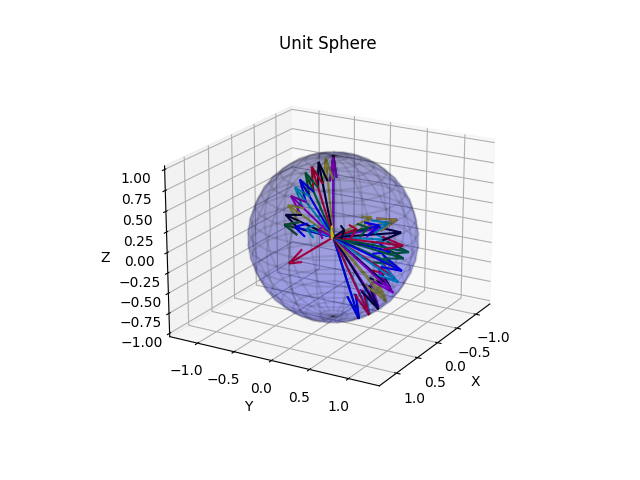

<Axes3D: title={'center': 'Unit Sphere'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [8]:
euls_list = [[ 1 , 0 , 0 ] ,
[ 0 , 1 , 0 ] ,
[ 0 , 0 , 1 ] ,
[ 0.0 , 0.0 , 1.0 ] ,
[0.0000, 0.0000, 1.0000],
[0.1089, -0.0372, 0.9934],
[0.2177, -0.0696, 0.9735],
[0.3249, -0.0967, 0.9408],
[0.4288, -0.1181, 0.8957],
[0.5279, -0.1334, 0.8388],
[0.6207, -0.1426, 0.7710],
[0.7058, -0.1453, 0.6933],
[0.7820, -0.1416, 0.6069],
[0.8482, -0.1315, 0.5131],
[0.9033, -0.1152, 0.4132],
[0.9033, -0.1152, 0.4132],
[0.9102, 0.0275, 0.4132],
[0.8947, 0.1696, 0.4132],
[0.8572, 0.3075, 0.4132],
[0.7985, 0.4378, 0.4132],
[0.7202, 0.5573, 0.4132],
[0.6242, 0.6631, 0.4132],
[0.5128, 0.7526, 0.4132],
[0.3887, 0.8235, 0.4132],
[0.2551, 0.8742, 0.4132],
[0.1152, 0.9033, 0.4132],
[0.1152, 0.9033, 0.4132],
[0.1152, 0.9568, 0.2668],
[0.1152, 0.9868, 0.1138],
[0.1152, 0.9925, -0.0420],
[0.1152, 0.9737, -0.1967],
[0.1152, 0.9309, -0.3466],
[0.1152, 0.8652, -0.4880],
[0.1152, 0.7782, -0.6173],
[0.1152, 0.6721, -0.7314],
[0.1152, 0.5494, -0.8276],
[0.1152, 0.4132, -0.9033],
[0.1152, 0.4132, -0.9033],
[-0.0435, 0.4669, -0.8832],
[-0.2045, 0.4978, -0.8429],
[-0.3623, 0.5048, -0.7835],
[-0.5119, 0.4877, -0.7072],
[-0.6482, 0.4471, -0.6164],
[-0.7668, 0.3842, -0.5141],
[-0.8638, 0.3013, -0.4037],
[-0.9361, 0.2009, -0.2889],
[-0.9811, 0.0865, -0.1733],
[-0.9974, -0.0383, -0.0608]]

plot_vector(euls_list)

In [9]:
np.set_printoptions(precision=2)
def q_mult(q1, q2):
    # w1, x1, y1, z1 = q1
    # w2, x2, y2, z2 = q2
    x = q1.w * q2.x + q1.x * q2.w + q1.y * q2.z - q1.z * q2.y
    y = q1.w * q2.y + q1.y * q2.w + q1.z * q2.x - q1.x * q2.z
    z = q1.w * q2.z + q1.z * q2.w + q1.x * q2.y - q1.y * q2.x
    w = q1.w * q2.w - q1.x * q2.x - q1.y * q2.y - q1.z * q2.z

    q_result = Quaternion(x,y,z,w)
    
    #normalize quaternion
    q_result_norm = np.sqrt(q_result.x**2 + q_result.y**2 + q_result.z**2 + q_result.w**2)
    q_result.x = q_result.x / q_result_norm
    q_result.y = q_result.y / q_result_norm
    q_result.z = q_result.z / q_result_norm
    q_result.w = q_result.w / q_result_norm

    return q_result

def q_conjugate(q):
    q_result = Quaternion(-q.x,-q.y,-q.z,q.w)
    return q_result

# def qv_mult(q1, v1):
#     q2 = (0.0,) + v1
#     return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

def quaternion_rotation_matrix(q):
    """
    Covert a quaternion into a full three-dimensional rotation matrix.
 
    Input
    :param Q: A 4 element array representing the quaternion (q0,q1,q2,q3) 
 
    Output
    :return: A 3x3 element matrix representing the full 3D rotation matrix. 
             This rotation matrix converts a point in the local reference 
             frame to a point in the global reference frame.
    """
    # Extract the values from Q
    q0 = q.w
    q1 = q.x
    q2 = q.y
    q3 = q.z
     
    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])
                            
    return rot_matrix

R1 = euler2rotm([50,50,50])
R2 = euler2rotm([0,0,90])


q0 = to_quaternion(EulerAngles(50,50,50))
q1 = to_quaternion(EulerAngles(0,0,90))

R1_quat = quaternion_rotation_matrix(q0)
R2_quat = quaternion_rotation_matrix(q1)

q_res = q_mult(q1,q0)

print("R2: \n", R2, "\nR2_quat: \n", R2_quat)
print("R1: \n", R1, "\nR1_quat: \n", R1_quat)
print("R2@R1: \n", R2@R1)
print("q_res: \n", quaternion_rotation_matrix(q_res))



R2: 
 [[ 6.12e-17 -1.00e+00  0.00e+00]
 [ 1.00e+00  6.12e-17  0.00e+00]
 [ 0.00e+00  0.00e+00  1.00e+00]] 
R2_quat: 
 [[ 2.22e-16 -1.00e+00  0.00e+00]
 [ 1.00e+00  2.22e-16  0.00e+00]
 [ 0.00e+00  0.00e+00  1.00e+00]]
R1: 
 [[ 0.41 -0.12  0.9 ]
 [ 0.49  0.86 -0.12]
 [-0.77  0.49  0.41]] 
R1_quat: 
 [[ 0.41 -0.12  0.9 ]
 [ 0.49  0.86 -0.12]
 [-0.77  0.49  0.41]]
R2@R1: 
 [[-0.49 -0.86  0.12]
 [ 0.41 -0.12  0.9 ]
 [-0.77  0.49  0.41]]
q_res: 
 [[-0.49 -0.86  0.12]
 [ 0.41 -0.12  0.9 ]
 [-0.77  0.49  0.41]]
